<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


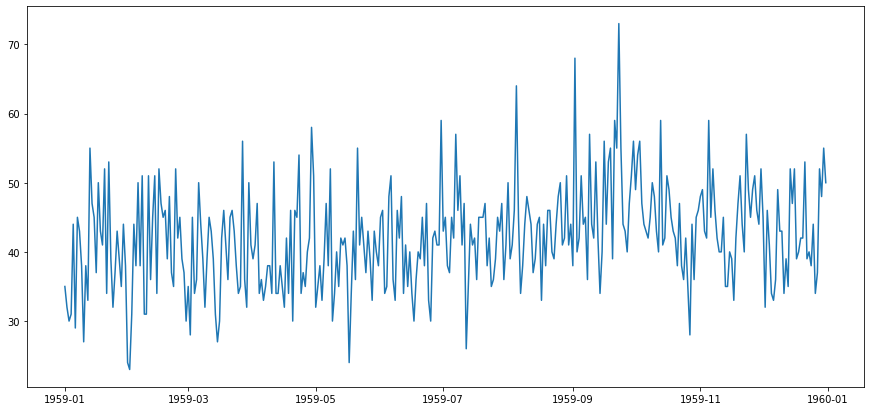

In [1]:
# 引入相关的包
import pandas as pd  # 表格和数据操作
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# -------------------------------------------------------------------------------------
# 读入数据
birth = pd.read_csv(r'./daily-total-female-births.csv', index_col=['Date'], parse_dates=['Date'])
birth.info()
birth.head()
plt.figure(figsize=(15, 7))
plt.plot(birth)

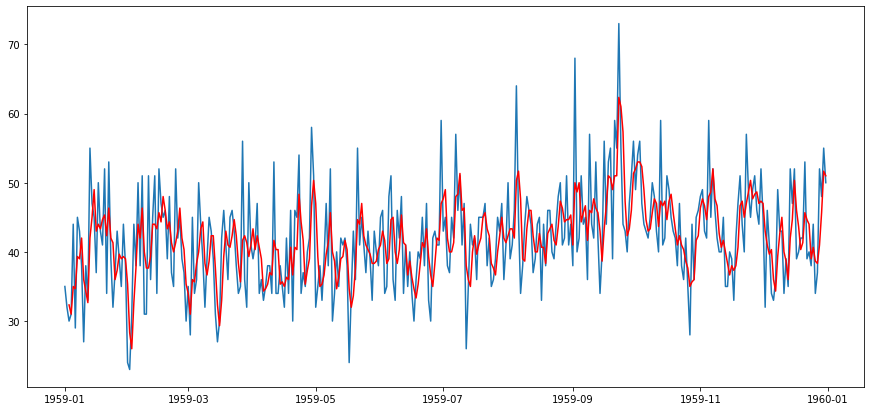

In [2]:
window = 3
# trail-rolling average transform
rolling = birth.rolling(window=window)
rolling_mean = rolling.mean()
plt.figure(figsize=(15, 7))
plt.plot(birth)
plt.plot(rolling_mean, 'r')

predicted=32.333333, excepted=31.000000
predicted=31.000000, excepted=44.000000
predicted=35.000000, excepted=29.000000
predicted=34.666667, excepted=45.000000
predicted=39.333333, excepted=43.000000
predicted=39.000000, excepted=38.000000
predicted=42.000000, excepted=27.000000
predicted=36.000000, excepted=38.000000
predicted=34.333333, excepted=33.000000
predicted=32.666667, excepted=55.000000
predicted=42.000000, excepted=47.000000
predicted=45.000000, excepted=45.000000
predicted=49.000000, excepted=37.000000
predicted=43.000000, excepted=50.000000
predicted=44.000000, excepted=43.000000
predicted=43.333333, excepted=41.000000
predicted=44.666667, excepted=52.000000
predicted=45.333333, excepted=34.000000
predicted=42.333333, excepted=53.000000
predicted=46.333333, excepted=39.000000
predicted=42.000000, excepted=32.000000
predicted=41.333333, excepted=37.000000
predicted=36.000000, excepted=43.000000
predicted=37.333333, excepted=39.000000
predicted=39.666667, excepted=35.000000


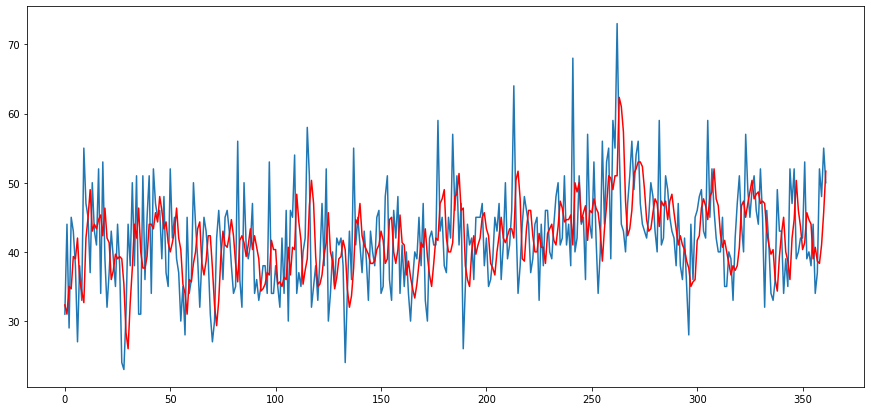

In [3]:
# prepare situation
X = birth.values
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length - window, length)])
    predictions.append(yhat)
    history.append(test[t])
    print('predicted=%f, excepted=%f' % (yhat, test[t]))

error = mean_squared_error(test, predictions)
print('Test MSE: %3f' % error)
plt.figure(figsize=(15, 7))
plt.plot(test)
plt.plot(predictions, 'r')